# Binar.ai
Binar.ai is an image recognition algorithm that can detect fixed-length handwritten binary numbers and convert them to decimals.

## Abstract
In this notebook, we will be implementing **Binar.ai**, with detailed explaination at each step. We will be curating our own training and testing datasets by concatenating data points found in the _MNIST_ database. The model will be built around a Convoluted Neural Network(CNN) and modified if need be.

## Curating Training and Testing Datasets
The scope of **Binar.ai** is limited to that of 4-digit binary numbers and, with a limited scope such as this, an off-the-shelves database that fits our scope is nearly impossible to find. Thus we will be curating our own datasets by concatenating data points in the _MNIST_ database of handwritten digits.<br><br>

In the [MNIST Database Exploration notebook](MNIST_Database_Explorartion.ipynb), we were successful in the concatenation mentioned before. In the code snippets below, we will replicate what was done in the [MNIST Database Exploration notebook](MNIST_Database_Explorartion.ipynb) and modify it to fit our requirements.

### Loading the MNIST Database
Let's first load the _MNIST_ Database and show some of these handwritten digits.

In [1]:
# Run this code cell to install the necessary libraries
!pip install matplotlib
!pip install tensorflow
!pip install numpy


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: C:\Users\shawn\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: C:\Users\shawn\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: C:\Users\shawn\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [1]:
# Importing Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import random # Random sampling
import time

*** MNIST Train ***
np.shape(mnist_x_train) = (60000, 28, 28)
np.shape(mnist_y_train) = (60000,)
Unique labels:
0
1
2
3
4
5
6
7
8
9
Data point visualization:


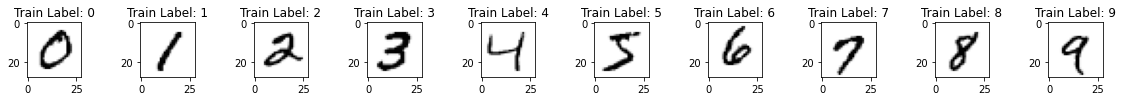

*** MNIST Test ***
np.shape(mnist_x_test) = (10000, 28, 28)
np.shape(mnist_y_test) = (10000,)
Unique labels:
0
1
2
3
4
5
6
7
8
9
Data point visualization:


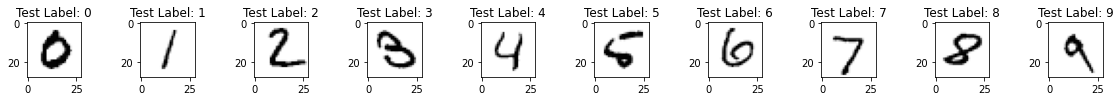

In [2]:
# Loading MNIST database
mnist = tf.keras.datasets.mnist
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()

# MNIST Train set
## Print unique labels
print("*** MNIST Train ***")
print(f"np.shape(mnist_x_train) = {np.shape(mnist_x_train)}")
print(f"np.shape(mnist_y_train) = {np.shape(mnist_y_train)}")
uniqueArr = np.unique(mnist_y_train)
uniqueArrSize = np.size(uniqueArr)
print("Unique labels:")
for label in uniqueArr:
    print(label) 
    
## Show a single example of each label from the training set
figTrain, axTrain = plt.subplots(1, uniqueArrSize, figsize=(20, 1))
print("Data point visualization:")
for i in range(uniqueArrSize):
    # Use the first example of a specified label
    sample = mnist_x_train[mnist_y_train==i][0]
    axTrain[i].imshow(sample, cmap="Greys")
    axTrain[i].set_title(f"Train Label: {i}")
plt.show()

# MNIST Test set
## Print unique labels
print("*** MNIST Test ***")
print(f"np.shape(mnist_x_test) = {np.shape(mnist_x_test)}")
print(f"np.shape(mnist_y_test) = {np.shape(mnist_y_test)}")
uniqueArr = np.unique(mnist_y_test)
uniqueArrSize = np.size(uniqueArr)
print("Unique labels:")
for label in uniqueArr:
    print(label)
    
## Show a single example of each label from the testing set
print("Data point visualization:")
figTest, axTest = plt.subplots(1, uniqueArrSize, figsize=(20, 1))
for i in range(uniqueArrSize):
    # Use the first example of a specified label
    sample = mnist_x_test[mnist_y_test==i][0]
    axTest[i].imshow(sample, cmap="Greys")
    axTest[i].set_title(f"Test Label: {i}")
plt.show()

### Filtering non-binary digits
Remember that our goal at this stage is to curate our own 4-digit binary number database - let's discard all examples not labeled $0$ or $1$.

In [3]:
def filterMNIST(train, test):
    # Train set
    filterCondition = np.isin(train[1], [0, 1])
    out_train = (train[0][filterCondition], train[1][filterCondition]) # Boolean indexing
    # Test set
    filterCondition = np.isin(test[1], [0, 1])
    out_test = (test[0][filterCondition], test[1][filterCondition]) # Boolean indexing
    return out_train, out_test

*** Binar.ai Train ***
np.shape(filtered_mnist_x_train) = (12665, 28, 28)
np.shape(filtered_mnist_y_train) = (12665,)
Unique labels:
0
1
Data point visualization:


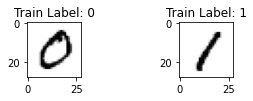

*** Binar.ai Test ***
np.shape(filtered_mnist_x_test) = (2115, 28, 28)
np.shape(filtered_mnist_y_test) = (2115,)
Unique labels:
0
1
Data point visualization:


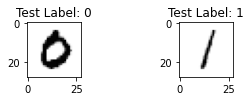

In [4]:
# Call filter function
(filtered_mnist_x_train, filtered_mnist_y_train), (filtered_mnist_x_test, filtered_mnist_y_test) = filterMNIST((mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test))

# Binar.ai Train set
## Print unique labels
print("*** Binar.ai Train ***")
print(f"np.shape(filtered_mnist_x_train) = {np.shape(filtered_mnist_x_train)}")
print(f"np.shape(filtered_mnist_y_train) = {np.shape(filtered_mnist_y_train)}")
uniqueArr = np.unique(filtered_mnist_y_train)
uniqueArrSize = np.size(uniqueArr)
print("Unique labels:")
for label in uniqueArr:
    print(label) 
    
## Show a single example of each label from the training set
figTrain, axTrain = plt.subplots(1, uniqueArrSize, figsize=(5, 1))
print("Data point visualization:")
for i in range(uniqueArrSize):
    # Use the first example of a specified label
    sample = filtered_mnist_x_train[filtered_mnist_y_train==i][0]
    axTrain[i].imshow(sample, cmap="Greys")
    axTrain[i].set_title(f"Train Label: {i}")
plt.show()

# Binar.ai Test set
## Print unique labels
print("*** Binar.ai Test ***")
print(f"np.shape(filtered_mnist_x_test) = {np.shape(filtered_mnist_x_test)}")
print(f"np.shape(filtered_mnist_y_test) = {np.shape(filtered_mnist_y_test)}")
uniqueArr = np.unique(filtered_mnist_y_test)
uniqueArrSize = np.size(uniqueArr)
print("Unique labels:")
for label in uniqueArr:
    print(label) 
    
## Show a single example of each label from the training set
figTrain, axTrain = plt.subplots(1, uniqueArrSize, figsize=(5, 1))
print("Data point visualization:")
for i in range(uniqueArrSize):
    # Use the first example of a specified label
    sample = filtered_mnist_x_test[filtered_mnist_y_test==i][0]
    axTrain[i].imshow(sample, cmap="Greys")
    axTrain[i].set_title(f"Test Label: {i}")
plt.show()

By filtering the _MNIST Database_, we can observe that the number of examples for both training and testing sets have been significantly cut down from 60,000 to 12665 examples and 10,000 to 2115 examples respectively. Although the size of examples have been significantly decreased, there is no need for worry as by concatenating the data points we are able to form<br><br>
$$
{{}^{12665}\!C_{4}} = 1.07 \times 10^{15} = 1,070,000,000,000,000
$$<br>
combinations of 4-digit numbers from the filtered training set and<br><br>
$$
{{}^{2115}\!C_{4}} = 8.3 \times 10^{11} = 830,000,000,000
$$<br>
combinations of 4-digit numbers from the filtered testing set.

### Forming our dataset
Now with the filtered training and testing datasets, we can curate a dataset that fits our requirements:
1. 4-digit binary number
2. Examples of size $(28 \times 4) \times 28 = 112 \times 4$<br><br>

There are a few ways for us to go about picking which examples in the filtered datasets to use for forming our own examples. Some of which includes:
- Simple Random Sampling
- Systematic Sampling
- Stratified Sampling<br>

Along with this, we want to have training and testing samples that cover all variations of 4-digit binary numbers:
$$
\begin{gather}
S = \{0000, 0001, 0010, ..., 1101, 1110, 1111\}\\
where \space |S| = 2^4 = 16
\end{gather}
$$<br>

Before that, let's separate our dataset by their labels.

In [5]:
def filterBinary(feature_set, label_set):
    filterCondition = np.isin(label_set, [0])
    set_zero = feature_set[filterCondition]
    filterCondition = np.isin(label_set, [1])
    set_one = feature_set[filterCondition]
    return set_zero, set_one

In [6]:
# Split filtered train test set to zeros and ones
filter_train_zero, filter_train_one = filterBinary(filtered_mnist_x_train, filtered_mnist_y_train)
filter_test_zero, filter_test_one = filterBinary(filtered_mnist_x_test, filtered_mnist_y_test)

# Some stats...
filter_train_zero_count = np.shape(filter_train_zero)[0]
filter_train_one_count = np.shape(filter_train_one)[0]
print("*** Ratio of zeros to ones in training and test sets ***")
print(f"Train zero:one ratio = {filter_train_zero_count}:{filter_train_one_count}")
filter_test_zero_count = np.shape(filter_test_zero)[0]
filter_test_one_count = np.shape(filter_test_one)[0]
print(f"Test zero:one ratio = {filter_test_zero_count}:{filter_test_one_count}")

*** Ratio of zeros to ones in training and test sets ***
Train zero:one ratio = 5923:6742
Test zero:one ratio = 980:1135


Now that we have separated our training and testing sets, we can finally start to curate our own training and testing datasets. For now, we want to fulfill every variation of 4-digit binary numbers as mentioned above. Let's start by curating $1000$ examples per variation. The digits will first be sampled using a simple random sampling.

In [7]:
def curateBinaraiDataset(feature_set_zero, feature_set_one, examples_per_variation):
    set_zero_size = np.shape(feature_set_zero)[0]
    set_one_size = np.shape(feature_set_one)[0]
    # Iterate from bin(0000) to bin(1111)
    binarai_feature_set = np.zeros((examples_per_variation * 16, 28, 28*4), np.uint8)
    binarai_label_set = np.zeros((examples_per_variation * 16), np.uint8)
    counter = 0
    for label in range(16):
        print(f"--- Forming examples for {bin(label)} ---")
        # Curate examples_per_variation number of examples for each variation (0000, 0001, ...)
        for i in range(examples_per_variation):
            # Progress report
            if (i <= 100):
                print(f"{i+1}/{examples_per_variation}", end='\r', flush=True)
                
            elif(i > 100):
                if (i % 100 == 0):
                    print(f"{i+1}/{examples_per_variation}", end='\r', flush=True)
                if (i == examples_per_variation-1):
                    print(f"{i+1}/{examples_per_variation}", end='\r', flush=True)
            
            # Concatenation
            new_example = np.zeros((28, 28), np.uint8)
            for shiftIdx in range(4):
                mask = 1 << shiftIdx
                # Current bit is '1'
                if (label & mask):
                    # Randomly select from feature_set_one dataset
                    sample = feature_set_one[random.randrange(set_one_size)]
                    if (shiftIdx > 0):
                        new_example = np.hstack((sample, new_example))
                    else:
                        new_example = sample
                # Current bit is '0'
                else:
                    # Randomly select from feature_set_zero dataset
                    sample = feature_set_zero[random.randrange(set_zero_size)]
                    if (shiftIdx > 0):
                        new_example = np.hstack((sample, new_example))
                    else:
                        new_example = sample
                    
            # Append newly curated example to binarai dataset
            binarai_feature_set[counter] = new_example
            binarai_label_set[counter] = label
            counter = counter+1

    return (binarai_feature_set, binarai_label_set)

*** Curating Train Set ***
--- Forming examples for 0b0 ---
--- Forming examples for 0b1 ---
--- Forming examples for 0b10 ---
--- Forming examples for 0b11 ---
--- Forming examples for 0b100 ---
--- Forming examples for 0b101 ---
--- Forming examples for 0b110 ---
--- Forming examples for 0b111 ---
--- Forming examples for 0b1000 ---
--- Forming examples for 0b1001 ---
--- Forming examples for 0b1010 ---
--- Forming examples for 0b1011 ---
--- Forming examples for 0b1100 ---
--- Forming examples for 0b1101 ---
--- Forming examples for 0b1110 ---
--- Forming examples for 0b1111 ---


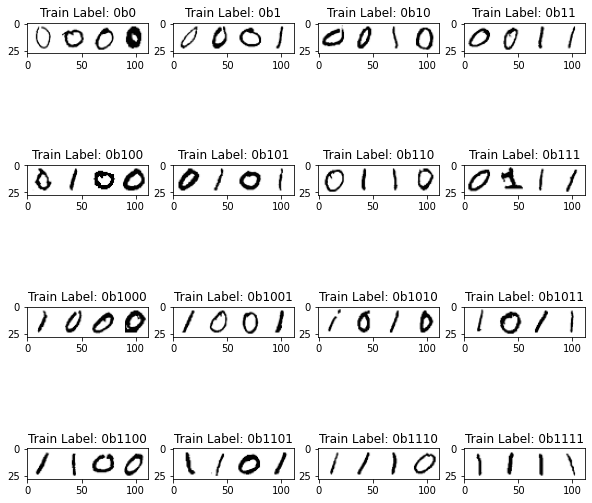

*** Curating Test Set ***
--- Forming examples for 0b0 ---
--- Forming examples for 0b1 ---
--- Forming examples for 0b10 ---
--- Forming examples for 0b11 ---
--- Forming examples for 0b100 ---
--- Forming examples for 0b101 ---
--- Forming examples for 0b110 ---
--- Forming examples for 0b111 ---
--- Forming examples for 0b1000 ---
--- Forming examples for 0b1001 ---
--- Forming examples for 0b1010 ---
--- Forming examples for 0b1011 ---
--- Forming examples for 0b1100 ---
--- Forming examples for 0b1101 ---
--- Forming examples for 0b1110 ---
--- Forming examples for 0b1111 ---


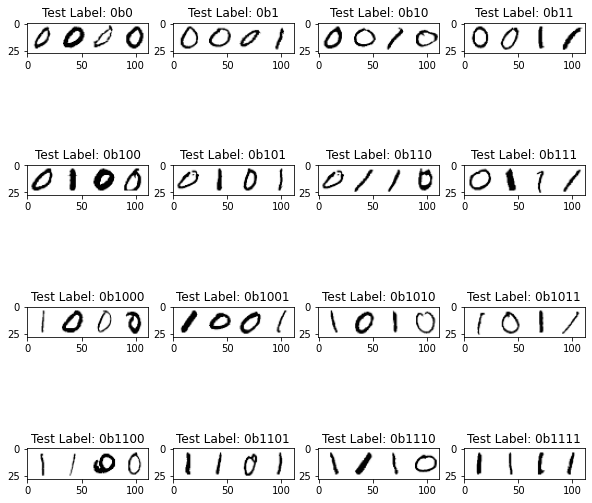

In [8]:
# Curate for Training set
print("*** Curating Train Set ***")
(binarai_x_train, binarai_y_train) = curateBinaraiDataset(filter_train_zero, filter_train_one, 6000)

figTrain, axTrain = plt.subplots(4, 4, figsize=(10, 10))
for i in range(16):
    # Use the first example of a specified label
    sample = binarai_x_train[binarai_y_train==i][0]
    axTrain[int(i/4)][int(i%4)].imshow(sample, cmap="Greys")
    axTrain[int(i/4)][int(i%4)].set_title(f"Train Label: {bin(i)}")
plt.show()

# Curate for Testing set
print("*** Curating Test Set ***")
(binarai_x_test, binarai_y_test) = curateBinaraiDataset(filter_test_zero, filter_test_one, 2000)

figTrain, axTrain = plt.subplots(4, 4, figsize=(10, 10))
for i in range(16):
    # Use the first example of a specified label
    sample = binarai_x_test[binarai_y_test==i][0]
    axTrain[int(i/4)][int(i%4)].imshow(sample, cmap="Greys")
    axTrain[int(i/4)][int(i%4)].set_title(f"Test Label: {bin(i)}")
plt.show()

## Convolution Neural Network
Now with our very own training and testing sets, let's implement the CNN to recognize our binaries. We will be heavily referencing from [this](Convolution_Neural_Network.ipynb) where we experimented on a simple handwritten digit classification problem.<br><br>
Before that, let's prepare our datasets for use with our CNN:

In [9]:
# Reshape feature set to have 1 color channel(luminance) for grescale
binarai_x_train = binarai_x_train.reshape(binarai_x_train.shape[0], binarai_x_train.shape[1], binarai_x_train.shape[2], 1)
binarai_x_test = binarai_x_test.reshape(binarai_x_test.shape[0], binarai_x_test.shape[1], binarai_x_test.shape[2], 1)

# Normalize values for better performance
binarai_x_train = binarai_x_train.astype('float32') / 255
binarai_x_test = binarai_x_test.astype('float32') / 255

# Turn ordinal data for labels into categorical (One-hot encode)
binarai_y_train = tf.keras.utils.to_categorical(binarai_y_train)
binarai_y_test = tf.keras.utils.to_categorical(binarai_y_test)

Now let's setup our CNN:

In [25]:
# Define CNN base
model = models.Sequential()

# Add layers into the model
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28*4,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='softmax'))

# Describe the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 110, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 55, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 53, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 26, 64)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8320)              0         
                                                                 
 dense (Dense)               (None, 64)                5

In [26]:
# Configures model for training
# Optimizers are techniques or algorithms used to decrease loss (an error) by tuning various parameters and weights,
# hence minimizing the loss function, providing better accuracy of model faster.  - Gradient Descent, Stochastic GD, RMSProp, etc.
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy',
                      tf.keras.metrics.TruePositives(),
                      tf.keras.metrics.FalsePositives(),
                      tf.keras.metrics.FalseNegatives(),
                     tf.keras.metrics.TrueNegatives()])

# Fitting the model
history = model.fit(binarai_x_train, binarai_y_train, validation_split=0.2, epochs=1, batch_size=64)

1200/1200 [==============================] - 117s 97ms/step - loss: 0.0542 - accuracy: 0.9829 - true_positives: 75106.0000 - false_positives: 652.0000 - false_negatives: 1694.0000 - true_negatives: 1151348.0000 - val_loss: 24.6812 - val_accuracy: 0.0624 - val_true_positives: 1199.0000 - val_false_positives: 16623.0000 - val_false_negatives: 18001.0000 - val_true_negatives: 271377.0000


## Prediction with custom images

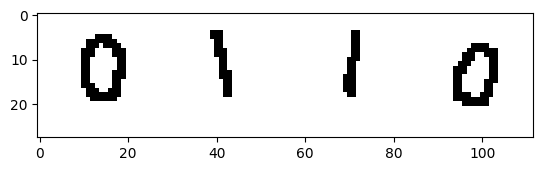

In [27]:
from PIL import Image

img = Image.open('custom_tests/custom_label_6.png')
imgData = np.asarray(img.getchannel('A'))
plt.imshow(imgData, cmap='Greys')

In [28]:
imgData = imgData.flatten()
imgData = imgData.reshape(1, 28, 112, 1)
imgData = imgData.astype('float32') / 255
result = model.predict(imgData)
print(result)
print(f"Predicted class: {np.argmax(result)}")

1/1 [==============================] - 0s 65ms/step
[[4.0277717e-10 4.7016000e-14 1.2723790e-07 1.7840127e-10 3.9993346e-09
  3.6736639e-10 9.9999750e-01 2.2790687e-06 1.7944897e-10 5.9792671e-13
  2.5575794e-08 6.3743375e-09 8.1717751e-08 4.2444329e-10 4.0414482e-13
  2.8172595e-14]]
Predicted class: 6


## Evaluation & Experimentation
Now that we have successfully implemented our very own 4-digit binary number classification algorithm, let's mess around with the model and hopefully we will learn something extra by doing so!

### Overfitting
Looking at the statistics spat out from model.fit() we can see that the validation loss(24.6812) is much higher than training loss(0.0542), a clear sign of overfitting. To tackle this, we will be using a _Dropout_ layer.<br>
A dropout layer helps with overfitting by randomly dropping out (i.e., set to zero) a certain percentage of the input units in a layer during training, forcing the network to learn redundant representations and reduces the risk of overfitting. Let's implement this.

In [39]:
# Define CNN base
model_dropout = models.Sequential()

# Add layers into the model
model_dropout.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28*4,1)))
model_dropout.add(layers.MaxPooling2D((2,2)))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Conv2D(64, (3,3), activation='relu'))
model_dropout.add(layers.MaxPooling2D((2,2)))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Flatten())
model_dropout.add(layers.Dense(64, activation='relu'))
model_dropout.add(layers.Dense(16, activation='softmax'))

# Describe the model
model_dropout.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 110, 32)       320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 55, 32)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 13, 55, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 53, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 26, 64)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 5, 26, 64)        

In [40]:
# Configuration
model_dropout.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy',
                      tf.keras.metrics.TruePositives(),
                      tf.keras.metrics.FalsePositives(),
                      tf.keras.metrics.FalseNegatives(),
                     tf.keras.metrics.TrueNegatives()])

# Fitting the model
history_dropout = model_dropout.fit(binarai_x_train, binarai_y_train, validation_split=0.2, epochs=3, batch_size=64)

Epoch 1/3
1200/1200 [==============================] - 123s 102ms/step - loss: 0.0734 - accuracy: 0.9764 - true_positives_6: 74517.0000 - false_positives_6: 989.0000 - false_negatives_6: 2283.0000 - true_negatives_6: 1151011.0000 - val_loss: 19.6896 - val_accuracy: 0.0624 - val_true_positives_6: 1199.0000 - val_false_positives_6: 16979.0000 - val_false_negatives_6: 18001.0000 - val_true_negatives_6: 271021.0000
Epoch 2/3
1200/1200 [==============================] - 115s 96ms/step - loss: 0.0077 - accuracy: 0.9974 - true_positives_6: 76599.0000 - false_positives_6: 201.0000 - false_negatives_6: 201.0000 - true_negatives_6: 1151799.0000 - val_loss: 22.0385 - val_accuracy: 0.0624 - val_true_positives_6: 1198.0000 - val_false_positives_6: 17294.0000 - val_false_negatives_6: 18002.0000 - val_true_negatives_6: 270706.0000
Epoch 3/3
1200/1200 [==============================] - 117s 97ms/step - loss: 0.0049 - accuracy: 0.9985 - true_positives_6: 76683.0000 - false_positives_6: 117.0000 - false

Weird, the validation accuracy seems to be extremely low as compared to training accuracy. Not only that, the validation accuracy does not seem to be increasing.<br>
To tackle this, let's increase the size of the training and testing sets.

In [10]:
print("Curating for train set")
(binarai_x_train_expanded, binarai_y_train_expanded) = curateBinaraiDataset(filter_train_zero, filter_train_one, 30000)
print("Curating for test set")
(binarai_x_test_expanded, binarai_y_test_expanded) = curateBinaraiDataset(filter_train_zero, filter_train_one, 6000)

# Reshape feature set to have 1 color channel(luminance) for grescale
binarai_x_train_expanded = binarai_x_train_expanded.reshape(binarai_x_train_expanded.shape[0], binarai_x_train_expanded.shape[1], binarai_x_train_expanded.shape[2], 1)
binarai_x_test_expanded = binarai_x_test_expanded.reshape(binarai_x_test_expanded.shape[0], binarai_x_test_expanded.shape[1], binarai_x_test_expanded.shape[2], 1)

# Normalize values for better performance
binarai_x_train_expanded = binarai_x_train_expanded.astype('float32') / 255
binarai_x_test_expanded = binarai_x_test_expanded.astype('float32') / 255

# Turn ordinal data for labels into categorical (One-hot encode)
binarai_y_train_expanded = tf.keras.utils.to_categorical(binarai_y_train_expanded)
binarai_y_test_expanded = tf.keras.utils.to_categorical(binarai_y_test_expanded)

Curating for train set
--- Forming examples for 0b0 ---
--- Forming examples for 0b1 ---
--- Forming examples for 0b10 ---
--- Forming examples for 0b11 ---
--- Forming examples for 0b100 ---
--- Forming examples for 0b101 ---
--- Forming examples for 0b110 ---
--- Forming examples for 0b111 ---
--- Forming examples for 0b1000 ---
--- Forming examples for 0b1001 ---
--- Forming examples for 0b1010 ---
--- Forming examples for 0b1011 ---
--- Forming examples for 0b1100 ---
--- Forming examples for 0b1101 ---
--- Forming examples for 0b1110 ---
--- Forming examples for 0b1111 ---
Curating for test set
--- Forming examples for 0b0 ---
--- Forming examples for 0b1 ---
--- Forming examples for 0b10 ---
--- Forming examples for 0b11 ---
--- Forming examples for 0b100 ---
--- Forming examples for 0b101 ---
--- Forming examples for 0b110 ---
--- Forming examples for 0b111 ---
--- Forming examples for 0b1000 ---
--- Forming examples for 0b1001 ---
--- Forming examples for 0b1010 ---
--- Forming

Furthermore, we will add regularization layers(Dropout) and increase the batch size to 128 while bringing epochs back down to 1.

In [60]:
# Redefine model to "clear" it
model_dropout = models.Sequential()

# Add layers into the model
model_dropout.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28*4,1)))
model_dropout.add(layers.MaxPooling2D((2,2)))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Conv2D(64, (3,3), activation='relu'))
model_dropout.add(layers.MaxPooling2D((2,2)))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Flatten())
model_dropout.add(layers.Dense(32, activation='relu'))
model_dropout.add(layers.Dense(16, activation='softmax'))

# Configuration
model_dropout.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy',
                      tf.keras.metrics.TruePositives(),
                      tf.keras.metrics.FalsePositives(),
                      tf.keras.metrics.FalseNegatives(),
                     tf.keras.metrics.TrueNegatives()])

# Fitting the model
history_dropout = model_dropout.fit(binarai_x_train_expanded, binarai_y_train_expanded, validation_split=0.3, epochs=1, batch_size=128)

2625/2625 [==============================] - 471s 179ms/step - loss: 0.0306 - accuracy: 0.9903 - true_positives_14: 331946.0000 - false_positives_14: 1792.0000 - false_negatives_14: 4054.0000 - true_negatives_14: 5038208.0000 - val_loss: 20.4563 - val_accuracy: 0.1663 - val_true_positives_14: 23946.0000 - val_false_positives_14: 115142.0000 - val_false_negatives_14: 120054.0000 - val_true_negatives_14: 2044858.0000


Seems like there has been some increase in the validation accuracy. Let's change up the optimizer to use Adaptive Moment Estimation(Adam) optimizer and see if that helps.

In [66]:
# Redefine model to "clear" it
model_dropout = models.Sequential()

# Add layers into the model
model_dropout.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28*4,1)))
model_dropout.add(layers.MaxPooling2D((2,2)))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Conv2D(64, (3,3), activation='relu'))
model_dropout.add(layers.MaxPooling2D((2,2)))
model_dropout.add(layers.Dropout(0.5))
model_dropout.add(layers.Flatten())
model_dropout.add(layers.Dense(32, activation='relu'))
model_dropout.add(layers.Dense(16, activation='softmax'))

# Configuration
model_dropout.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy',
                      tf.keras.metrics.TruePositives(),
                      tf.keras.metrics.FalsePositives(),
                      tf.keras.metrics.FalseNegatives(),
                     tf.keras.metrics.TrueNegatives()])

# Fitting the model
history_dropout = model_dropout.fit(binarai_x_train_expanded, binarai_y_train_expanded, validation_split=0.3, epochs=1, batch_size=128)

2625/2625 [==============================] - 499s 190ms/step - loss: 0.0353 - accuracy: 0.9892 - true_positives_17: 331414.0000 - false_positives_17: 2039.0000 - false_negatives_17: 4586.0000 - true_negatives_17: 5037961.0000 - val_loss: 19.6775 - val_accuracy: 0.1664 - val_true_positives_17: 23963.0000 - val_false_positives_17: 119659.0000 - val_false_negatives_17: 120037.0000 - val_true_negatives_17: 2040341.0000


As seen from the metrics, this has improved our overfitting issue ever so slightly.

### Evaluation
Now with the optimized model, let's compare it to the original model.

In [63]:
# Fit the original model to new dataset
model = models.Sequential()
# Add layers into the model
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28*4,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy',
                      tf.keras.metrics.TruePositives(),
                      tf.keras.metrics.FalsePositives(),
                      tf.keras.metrics.FalseNegatives(),
                     tf.keras.metrics.TrueNegatives()])
history = model.fit(binarai_x_train_expanded, binarai_y_train_expanded, validation_split=0.2, epochs=1, batch_size=64)

# Evaluate the model
original_result = model.evaluate(binarai_x_train_expanded, binarai_y_test)
optimized_result = model_dropout.evaluate(binarai_x_test, binarai_y_test)

1000/1000 [==============================] - 13s 13ms/step - loss: 6.1429 - accuracy: 0.7488 - true_positives_14: 23963.0000 - false_positives_14: 7707.0000 - false_negatives_14: 8037.0000 - true_negatives_14: 472293.0000


### Epochs, Epochs, Epochs
One of the questions that we had in mind was _"What happens if we increase the number of epochs?"_ As an understanding, an epoch is defined as _a complete iteration through a dataset during the training process of the model_.<br>
With every goal of all Machine Learning models, we hope that by increasing the epoch, we are able to increase the accuracy of the model. In the following cell, let's do just that and we may just see something interesting...

In [29]:
# Define model - Modified from original model
exp_epoch_model = models.Sequential()
exp_epoch_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28*4,1)))
exp_epoch_model.add(layers.MaxPooling2D((2,2)))
exp_epoch_model.add(layers.Conv2D(64, (3,3), activation='relu'))
exp_epoch_model.add(layers.MaxPooling2D((2,2)))
exp_epoch_model.add(layers.Flatten())
exp_epoch_model.add(layers.Dense(64, activation='relu'))
exp_epoch_model.add(layers.Dense(16, activation='softmax'))

# Configure and fit model with epoch=5 instead of 1 from before
exp_epoch_model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy',
                      tf.keras.metrics.TruePositives(),
                      tf.keras.metrics.FalsePositives(),
                      tf.keras.metrics.FalseNegatives(),
                     tf.keras.metrics.TrueNegatives()])
history = exp_epoch_model.fit(binarai_x_train, binarai_y_train, validation_split=0.2, epochs=5, batch_size=64)

Epoch 1/5
1200/1200 [==============================] - 119s 98ms/step - loss: 0.0521 - accuracy: 0.9830 - true_positives_1: 75116.0000 - false_positives_1: 611.0000 - false_negatives_1: 1684.0000 - true_negatives_1: 1151389.0000 - val_loss: 26.2285 - val_accuracy: 0.0624 - val_true_positives_1: 1198.0000 - val_false_positives_1: 17849.0000 - val_false_negatives_1: 18002.0000 - val_true_negatives_1: 270151.0000
Epoch 2/5
1200/1200 [==============================] - 112s 93ms/step - loss: 0.0018 - accuracy: 0.9995 - true_positives_1: 76760.0000 - false_positives_1: 40.0000 - false_negatives_1: 40.0000 - true_negatives_1: 1151960.0000 - val_loss: 33.0261 - val_accuracy: 0.0625 - val_true_positives_1: 1200.0000 - val_false_positives_1: 17851.0000 - val_false_negatives_1: 18000.0000 - val_true_negatives_1: 270149.0000
Epoch 3/5
1200/1200 [==============================] - 106s 88ms/step - loss: 3.1145e-04 - accuracy: 0.9999 - true_positives_1: 76795.0000 - false_positives_1: 5.0000 - false_

In [30]:
# Evaluate the model
one_epoch_result = model.evaluate(binarai_x_test, binarai_y_test)
five_epoch_result = exp_epoch_model.evaluate(binarai_x_test, binarai_y_test)

1000/1000 [==============================] - 13s 12ms/step - loss: 9.8534 - accuracy: 0.8119 - true_positives_1: 25982.0000 - false_positives_1: 5985.0000 - false_negatives_1: 6018.0000 - true_negatives_1: 474015.0000


Text(0, 0.5, 'Accuracy')

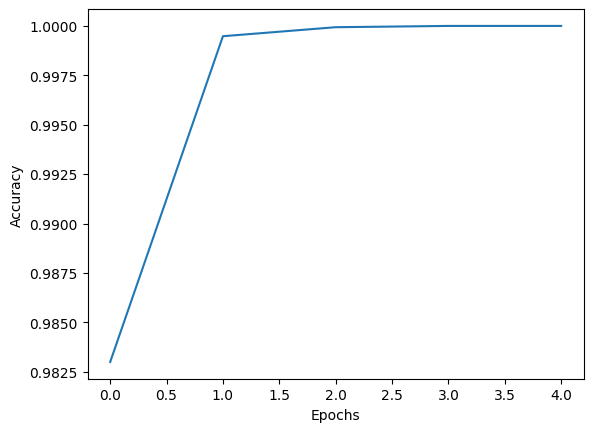

In [31]:
# Plot accuracy/epocs
plt.plot(history.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

By training the model over 5 epochs, we see that most of the important features from the data has been learned after the first epoch and the accuracy of the model start to flatten out. From the printed output, we see that the accuracy is about $100\%$ by the third epoch and should probably stop the training after the third epoch to save on training time.

### Batch Size - Small, Medium, Large?
From dealing with the [Overfitting](#Overfitting) problem, we have learnt that adjusting the batch size can help reduce overfitting.<br>
With the smallest batch size of _batch_size=1_, we are performing more individual back-propagations through the network, over-emphasizing individual effects, taking more time due to having to perform more back-propagations.<br>
On the other hand, having a large batch size, let's say the size of the input, would mean that we are averaging the result of all the images, and then performing one back-propagation on the network. This might lead to us missing some little-seen features.<br><br>
In the example below, we train our model with a batch size of 4096 and a single epoch and compare it to the previously trained model of batch size 64 and a single epoch:

In [19]:
# Define model
exp_batch_model = models.Sequential()
exp_batch_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28*4,1)))
exp_batch_model.add(layers.MaxPooling2D((2,2)))
exp_batch_model.add(layers.Conv2D(64, (3,3), activation='relu'))
exp_batch_model.add(layers.MaxPooling2D((2,2)))
exp_batch_model.add(layers.Flatten())
exp_batch_model.add(layers.Dense(64, activation='relu'))
exp_batch_model.add(layers.Dense(16, activation='softmax'))

# Configure and fit model with epoch=3 instead of 1 from before
exp_batch_model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy',
                      tf.keras.metrics.TruePositives(),
                      tf.keras.metrics.FalsePositives(),
                      tf.keras.metrics.FalseNegatives(),
                     tf.keras.metrics.TrueNegatives()])
history = exp_batch_model.fit(binarai_x_train, binarai_y_train, epochs=1, batch_size=4096)

24/24 [==============================] - 128s 5s/step - loss: 1.2240 - accuracy: 0.6496 - true_positives_2: 43911.0000 - false_positives_2: 4655.0000 - false_negatives_2: 52089.0000 - true_negatives_2: 1435345.0000


In [20]:
# Evaluate the model
sixfour_batch_result = model.evaluate(binarai_x_test, binarai_y_test)
fourzeroninesix_batch_result = exp_batch_model.evaluate(binarai_x_test, binarai_y_test)

1000/1000 [==============================] - 16s 16ms/step - loss: 0.1648 - accuracy: 0.9602 - true_positives_2: 30398.0000 - false_positives_2: 1039.0000 - false_negatives_2: 1602.0000 - true_negatives_2: 478961.0000


As predicted, the accuracy of the model with a larger batch size yielded a lower accuracy metric.<br>
In a actual scenario, the goal should be to find the "sweet spot" that provides the fastest convergence to a near-optimal accuracy. Some of the things to consider while searching for this "sweet spot" are:
- Memory size: you want to be able to ingest the entire batch into memory at once. This allows your model to pipeline reading and processing. If you exceed available memory, you will lose a lot of time to swapping. If you under-use the memory, you leave some potential performance untapped.
- Processors: if you're on a multi-processor chip, you want to keep them all busy. If you care to assign processors through your OS controls, you'll also want to play with how many to assign to model computation, and how many to assign to I/O and system use. For instance, in one project I did, our group found that our 32 cores were best used with 28 allocated to computation, 4 reserved for I/O and other system functions.
- Scaling: some characteristics work best in powers of 2. You may find that a batch size that is 2^n or 3 * 2^n for some n, works best, simply because of block sizes and other system allocations.

Reference link [here](https://stackoverflow.com/questions/66716370/batch-size-and-training-time).

### All Together Now
Now, let's put together all these optimizations.

In [67]:
# Define the final model
model_final = models.Sequential()

# Add layers into the model
model_final.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28*4,1)))
model_final.add(layers.MaxPooling2D((2,2)))
model_final.add(layers.Dropout(0.5))
model_final.add(layers.Conv2D(64, (3,3), activation='relu'))
model_final.add(layers.MaxPooling2D((2,2)))
model_final.add(layers.Dropout(0.5))
model_final.add(layers.Flatten())
model_final.add(layers.Dense(32, activation='relu'))
model_final.add(layers.Dense(16, activation='softmax'))

# Configuration
model_final.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy',
                      tf.keras.metrics.TruePositives(),
                      tf.keras.metrics.FalsePositives(),
                      tf.keras.metrics.FalseNegatives(),
                     tf.keras.metrics.TrueNegatives()])

# Fitting the model
history_final = model_final.fit(binarai_x_train_expanded,
                                binarai_y_train_expanded,
                                validation_split=0.3,
                                epochs=5,
                                batch_size=128,
                                callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])

Epoch 1/5
2625/2625 [==============================] - 568s 216ms/step - loss: 0.0291 - accuracy: 0.9910 - true_positives_18: 332276.0000 - false_positives_18: 1918.0000 - false_negatives_18: 3724.0000 - true_negatives_18: 5038082.0000 - val_loss: 23.7402 - val_accuracy: 0.1664 - val_true_positives_18: 23957.0000 - val_false_positives_18: 119027.0000 - val_false_negatives_18: 120043.0000 - val_true_negatives_18: 2040973.0000
Epoch 2/5
2625/2625 [==============================] - 524s 200ms/step - loss: 0.0034 - accuracy: 0.9990 - true_positives_18: 335647.0000 - false_positives_18: 351.0000 - false_negatives_18: 353.0000 - true_negatives_18: 5039649.0000 - val_loss: 22.2464 - val_accuracy: 0.1666 - val_true_positives_18: 23996.0000 - val_false_positives_18: 117180.0000 - val_false_negatives_18: 120004.0000 - val_true_negatives_18: 2042820.0000
Epoch 3/5
2625/2625 [==============================] - 515s 196ms/step - loss: 0.0018 - accuracy: 0.9994 - true_positives_18: 335791.0000 - fals

In [70]:
# Evaluate
final_result = model_final.evaluate(binarai_x_test, binarai_y_test)

1000/1000 [==============================] - 13s 13ms/step - loss: 7.4865 - accuracy: 0.7494 - true_positives_18: 23982.0000 - false_positives_18: 8015.0000 - false_negatives_18: 8018.0000 - true_negatives_18: 471985.0000


### Train Now, Use Later
If you have decided to run all the code cells above, you would quickly understand how arduous and painful it is to train the models(_unless you use that as an excuse to go for a quick break_). We will be using methods from Keras to save the entire model containing the model's architecture, weights, and training configuration.<br>

Let's try it out:

In [78]:
#!mkdir -p models # Create a new directory to store models

# Save the entire model
model.save('models/original_model')
exp_epoch_model.save('models/epoch_model')
exp_batch_model.save('models/batch_model')
model_dropout.save('models/dropout_model')
model_final.save('models/final_model')

INFO:tensorflow:Assets written to: models/original_model\assets


INFO:tensorflow:Assets written to: models/original_model\assets


INFO:tensorflow:Assets written to: models/epoch_model\assets


INFO:tensorflow:Assets written to: models/epoch_model\assets


INFO:tensorflow:Assets written to: models/dropout_model\assets


INFO:tensorflow:Assets written to: models/dropout_model\assets


INFO:tensorflow:Assets written to: models/final_model\assets


INFO:tensorflow:Assets written to: models/final_model\assets


To load up a previously saved mode, we do:

In [74]:
# Load model
saved_original_model = models.load_model('models/original_model')

# Check summary
saved_original_model.summary()

# Predict custom handwritten binaries to do a check
result = saved_original_model.predict(imgData)
print(result)
print(f"Predicted class: {np.argmax(result)}")

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 26, 110, 32)       320       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 13, 55, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 11, 53, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 5, 26, 64)        0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 8320)              0         
                                                                 
 dense_30 (Dense)            (None, 64)              

1/1 [==============================] - 0s 60ms/step
[[5.7934684e-26 8.9294425e-30 5.2868760e-12 5.2359425e-25 2.2055401e-10
  3.5856806e-20 1.0000000e+00 2.4239468e-11 5.8099548e-34 2.0410318e-37
  4.8549277e-15 1.1779725e-24 2.0487429e-18 3.8854151e-25 9.7228215e-21
  6.8661898e-22]]
Predicted class: 6


As we can see, the model has been reloaded, architecture and everything else. TensorFlow and Keras provides alternative methods to save/load models, some even allowing saving/loading from a checkpoint to resume training.

## Conclusion
In this series of notebooks, we have implemented a 4-digit handwritten binary classification model and gained insights on how the following:
- Visualizing the MNIST database
- Curating our own database using MNIST
- CNN and its components
- Implementing a CNN
- Dealing with overfitting
- Hyperparameters and what they do
- Saving and loading models

### Limitations
As a project with a reduced scope, there were a few limitations that we ran into while developing this project:
- Although the evaluation of the model against our generated test set works great, custom handwritten tests do not work as well. This is due to the format of the images introduced by MNIST(normalized, centered, etc.), and having an image that exceeds the margins of the image(20x20px, 28x28px) decreases the accuracy of the predictions significantly.
- Given the time-constraint amidst other modules, we were not able to fully experiment with various configurations of the neural network, or even compare it to various forms of image recognition neural networks.

### Closing words
Coming to the end of this project, we believe that we have met our intended goals of this project, being to get some hands-on experience with industry frameworks and showcase the knowledge we have gained throughout the course. We would also like to extend our gratitude to Dr. Tong Rong for her advice throughout this project.

## Errors
### 3 Apr 2023
It has come to my attention that the reason why the training accuracy is significantly greater than validation accuracy was due to how _validation_split_ works in TensorFlow. _validation_split_ splits the training set by $x$ percent from the bottom of the input set. This posed to be an issue as the dataset has not been shuffled and the examples are ordered by their decimal value during data curation. E.g:
1. 0000
2. 0001

...

15. 1111

As a fix, let's shuffle the training set before calling _fit()_.

In [17]:
# Define the final model
model_fixed = models.Sequential()

# Add layers into the model
model_fixed.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28*4,1)))
model_fixed.add(layers.MaxPooling2D((2,2)))
model_fixed.add(layers.Dropout(0.5))
model_fixed.add(layers.Conv2D(64, (3,3), activation='relu'))
model_fixed.add(layers.MaxPooling2D((2,2)))
model_fixed.add(layers.Dropout(0.5))
model_fixed.add(layers.Flatten())
model_fixed.add(layers.Dense(32, activation='relu'))
model_fixed.add(layers.Dense(16, activation='softmax'))

# Configuration
model_fixed.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Shuffle training set
p = np.random.permutation(len(binarai_x_train))

# Fitting the model
history_fixed = model_fixed.fit(binarai_x_train[p],
                                binarai_y_train[p],
                                validation_split=0.2,
                                shuffle=True,
                                epochs=5,
                                batch_size=64,
                                callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])

Epoch 1/5
1200/1200 [==============================] - 93s 77ms/step - loss: 0.0963 - accuracy: 0.9699 - val_loss: 0.0105 - val_accuracy: 0.9965
Epoch 2/5
1200/1200 [==============================] - 93s 77ms/step - loss: 0.0144 - accuracy: 0.9954 - val_loss: 0.0079 - val_accuracy: 0.9977
Epoch 3/5
1200/1200 [==============================] - 95s 79ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0038 - val_accuracy: 0.9987
Epoch 4/5
1200/1200 [==============================] - 93s 77ms/step - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.0014 - val_accuracy: 0.9997
Epoch 5/5
1200/1200 [==============================] - 93s 77ms/step - loss: 0.0046 - accuracy: 0.9984 - val_loss: 0.0018 - val_accuracy: 0.9993


In [18]:
# Evaluation
model_fixed.evaluate(binarai_x_test, binarai_y_test)

1000/1000 [==============================] - 9s 9ms/step - loss: 0.0035 - accuracy: 0.9987


[0.0035007623955607414, 0.9987499713897705]

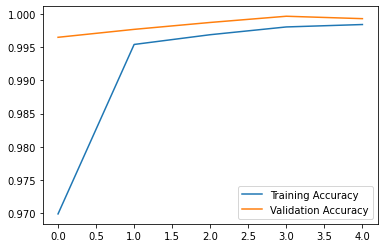

In [20]:
plt.plot(history_fixed.history['accuracy'])
plt.plot(history_fixed.history['val_accuracy'])
plt.legend(['Training Accuracy', 'Validation Accuracy'])

Here we see that the validation accuracy is indeed slightly higher than the training accuracy, a good indication that the model is well-fitted.